##### 问题描述

大家好，我们在用 networkx 显示中文的时候，会发现不能显示中文。 

##### 解决办法

1. 下载Github仓库中的字体SimHei.ttf； 
2. 在 jupyter notebook 中执行
```python
import matplotlib
print(matplotlib.__path__)
```
找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

```bash
$ mv SimHei.ttf DejaVuSans.ttf
```

其中，用到的 ttf 字体。 我给大家传到附件上了。 

In [39]:
import matplotlib
print(matplotlib.__path__)

['/home/abc/anaconda3/lib/python3.7/site-packages/matplotlib']


Previous Course

1. What's the language model? OOV problem? 
2. Syntax Tree. lambda 

$$ pr(w) $$

## Out of Vocabulary(OOV)

Pr(w_o) = constant < Pr(w_1)

## Language Model: Smooth

In [1]:
import random

In [2]:
"""adj* => adj* adj | adj null"""

def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

def adj_star_2():
     return random.choice([lambda : '', lambda : adj() + adj_star_2()])()

def adj_star():
    return random.choice(['', ajd() + adj_star()])

In [3]:
lambda : adj() + adj_star_2()

<function __main__.<lambda>()>

In [4]:
numbers = [1, -2, -4, 1, 5, 6, 9, -11]

In [5]:
def absolute(number): 
    if number < 0: return -1 * number
    else:
        return number

In [6]:
absolute(-11)

11

In [9]:
mod_5(6)

1

In [39]:
mod_5(7)

2

In [8]:
def mod_5(number): 
    return number % 5

sorted(numbers, key=lambda x: x % 5)

[5, 1, -4, 1, 6, -2, 9, -11]

In [10]:
mod_5_lambda = lambda x: x % 5

In [11]:
mod_5

<function __main__.mod_5(number)>

In [12]:
mod_5_lambda(19)

4

In [13]:
mod_5(19)

4

In [19]:
adj_star_2()

'小小的'

## Search Policy

In [20]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [21]:
city_location = {
    '香港': (114.17, 22.28)
}

Input: String -> dict

In [22]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [23]:
import re

In [24]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [25]:
re.findall(pattern=pattern,string=coordination_source)

[('兰州', '103.73', '36.03'),
 ('嘉峪关', '98.17', '39.47'),
 ('西宁', '101.74', '36.56'),
 ('成都', '104.06', '30.67'),
 ('石家庄', '114.48', '38.03'),
 ('拉萨', '102.73', '25.04'),
 ('贵阳', '106.71', '26.57'),
 ('武汉', '114.31', '30.52'),
 ('郑州', '113.65', '34.76'),
 ('济南', '117', '36.65'),
 ('南京', '118.78', '32.04'),
 ('合肥', '117.27', '31.86'),
 ('杭州', '120.19', '30.26'),
 ('南昌', '115.89', '28.68'),
 ('福州', '119.3', '26.08'),
 ('广州', '113.23', '23.16'),
 ('长沙', '113', '28.21'),
 ('海口', '110.35', '20.02'),
 ('沈阳', '123.38', '41.8'),
 ('长春', '125.35', '43.88'),
 ('哈尔滨', '126.63', '45.75'),
 ('太原', '112.53', '37.87'),
 ('西安', '108.95', '34.27'),
 ('台湾', '121.30', '25.03'),
 ('北京', '116.46', '39.92'),
 ('上海', '121.48', '31.22'),
 ('重庆', '106.54', '29.59'),
 ('天津', '117.2', '39.13'),
 ('呼和浩特', '111.65', '40.82'),
 ('南宁', '108.33', '22.84'),
 ('西藏', '91.11', '29.97'),
 ('银川', '106.27', '38.47'),
 ('乌鲁木齐', '87.68', '43.77'),
 ('香港', '114.17', '22.28'),
 ('澳门', '113.54', '22.19')]

In [26]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: 
        continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [27]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [28]:
import math

In [29]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    根据两个城市之间的坐标,返回实际两个城市之间的直线距离
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    # 转换为弧度返回
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [30]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [31]:
get_geo_distance('上海', '香港')

933.9310389667804

In [32]:
import networkx as nx

In [33]:
city_graph = nx.Graph()

In [34]:
city_graph.add_nodes_from(list(city_location.keys()))

In [35]:
%matplotlib inline

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

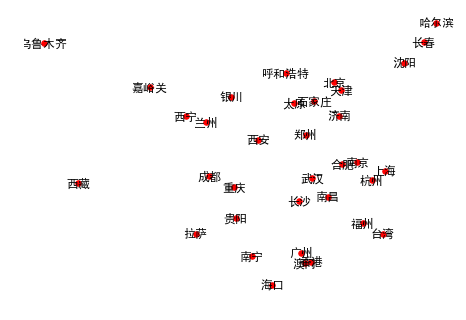

In [37]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [38]:
threshold = 300 # 设置一个距离门槛值

In [39]:
from collections import defaultdict
city_connection = defaultdict(list)


In [45]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: 
            continue
        #m 获取两个城市之间的直线距离
#         distance = get_geo_distance(c1, c2)
        
#         if distance < threshold:
        city_connection[c1].append(c2)
        city_connection[c2].append(c1)

In [46]:
city_connection

defaultdict(list,
            {'香港': ['兰州',
              '嘉峪关',
              '西宁',
              '成都',
              '石家庄',
              '拉萨',
              '贵阳',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '海口',
              '沈阳',
              '长春',
              '哈尔滨',
              '太原',
              '西安',
              '台湾',
              '北京',
              '上海',
              '重庆',
              '天津',
              '呼和浩特',
              '南宁',
              '西藏',
              '银川',
              '乌鲁木齐',
              '澳门',
              '兰州',
              '嘉峪关',
              '西宁',
              '成都',
              '石家庄',
              '拉萨',
              '贵阳',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
       

In [47]:
city_with_road = nx.Graph(city_connection)

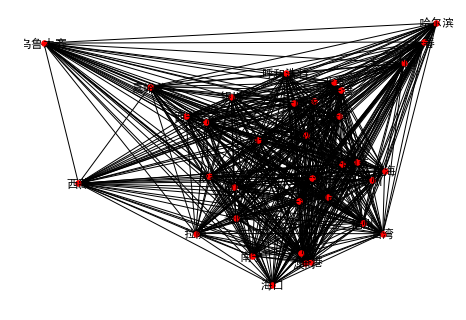

In [48]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [1]:
from collections import defaultdict


In [2]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [3]:
simple_connection_info = defaultdict(list)

In [4]:
simple_connection_info.update(simple_connection_info_src)

In [49]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: 
            continue
        
        for successor in graph[froninter]:
            if successor in seen: 
                continue
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [50]:
bfs(simple_connection_info,'西安')

{'兰州', '南宁', '福州', '西安', '长沙'}

In [7]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [8]:
bfs(number_grpah, 1)

{1, 2, 3, 4, 5, 6, 7, 8}

In [51]:
simple_connection_info['西安']

['兰州', '长沙']

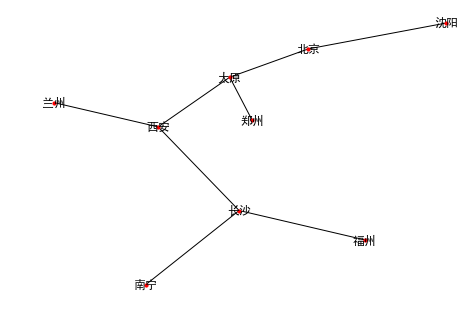

In [52]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

In [53]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [54]:
def search(start, destination, connection_grpah):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]  # 每条路径必须是广度优先
        if froninter in visitied: 
            continue
            
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: 
                continue  # eliminate loop
            # 效果等同于extend
            new_path = path + [city]
            
            pathes.append(new_path)
            if city == destination: 
                return new_path
        
        visitied.add(froninter)
        
#         pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [19]:
simple_connection_info

defaultdict(list,
            {'北京': ['太原', '沈阳'],
             '太原': ['北京', '西安', '郑州'],
             '兰州': ['西安'],
             '郑州': ['太原'],
             '西安': ['兰州', '长沙'],
             '长沙': ['福州', '南宁'],
             '沈阳': ['北京'],
             '福州': [],
             '南宁': []})

In [14]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [15]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [16]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: 
        return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1,len(path)):
            distance += get_geo_distance(path[i-1],path[i])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [17]:
def add(x,y):
    if not x or not y:
        return 'Wrong value'
    def sub_add(z):
        return x+y+z
    return sub_add

func=add(1,2)
result=func(3)
print(result)

6


In [18]:
search('兰州', '长沙', simple_connection_info)

[['兰州', '西安']]
[['兰州', '西安', '长沙']]


['兰州', '西安', '长沙']

In [23]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [204]:
pretty_print(search('北京', '福州', simple_connection_info))

北京🚗->太原🚗->西安🚗->长沙🚗->福州


## Breath first search

## Depth first search

In [216]:
pretty_print(search('北京', '南京', city_connection))

北京🚗->济南🚗->合肥🚗->南京


In [217]:
pretty_print(search('北京', '长沙', city_connection))

北京🚗->石家庄🚗->郑州🚗->长沙


In [249]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_stations_first))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


In [251]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_possible))

北京🚗->石家庄🚗->郑州🚗->武汉🚗->长沙🚗->广州


## Assignment

1. 网络爬虫 + 正则
2. 数据处理
3. 算法的应用能力

In [254]:
import requests

In [255]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [257]:
response = requests.get(url)

In [270]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [271]:
pattern = re.compile(what_we_want)

In [272]:
likes = pattern.findall(response.text)

In [273]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/25828589/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page


## Machine Learning

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
X, y = data['data'], data['target']

In [5]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [6]:
y[1]

21.6

In [7]:
len(X[:, 0])

506

In [8]:
len(y)

506

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

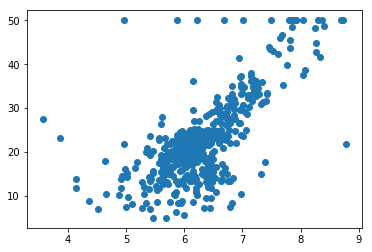

In [19]:
draw_rm_and_price()

In [20]:
import random

In [21]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

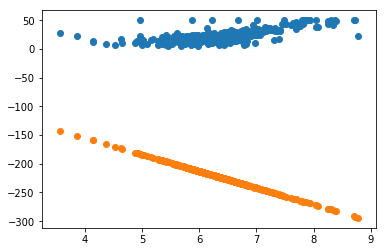

In [22]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

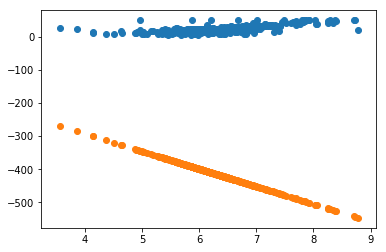

In [23]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

$$ \hat{y} $$

In [24]:
list(y)[:20]

[24.0,
 21.6,
 34.7,
 33.4,
 36.2,
 28.7,
 22.9,
 27.1,
 16.5,
 18.9,
 15.0,
 18.9,
 21.7,
 20.4,
 18.2,
 19.9,
 23.1,
 17.5,
 20.2,
 18.2]

In [25]:
price_by_random_k_and_b

[-429.475,
 -421.313,
 -461.805,
 -451.894,
 -459.791,
 -421.78999999999996,
 -399.63599999999997,
 -408.116,
 -379.443,
 -399.212,
 -418.981,
 -399.47700000000003,
 -393.117,
 -396.29699999999997,
 -404.088,
 -390.202,
 -395.555,
 -398.47,
 -370.168,
 -384.531,
 -376.21000000000004,
 -397.145,
 -406.526,
 -389.089,
 -394.97200000000004,
 -377.747,
 -389.089,
 -401.491,
 -425.235,
 -434.72200000000004,
 -383.789,
 -402.81600000000003,
 -396.35,
 -383.15299999999996,
 -404.088,
 -395.449,
 -390.57300000000004,
 -391.04999999999995,
 -397.19800000000004,
 -430.53499999999997,
 -453.272,
 -439.81,
 -407.957,
 -410.183,
 -402.657,
 -382.146,
 -387.65799999999996,
 -400.59000000000003,
 -367.147,
 -377.906,
 -397.039,
 -405.095,
 -426.083,
 -398.894,
 -393.064,
 -465.197,
 -419.299,
 -442.248,
 -406.685,
 -395.131,
 -385.27299999999997,
 -397.19800000000004,
 -423.168,
 -439.38599999999997,
 -457.512,
 -414.37,
 -387.711,
 -392.534,
 -377.482,
 -392.905,
 -421.101,
 -396.933,
 -402.445,
 -4

In [26]:
[1, 1, 1]
[2, 2, 2]

[2, 2, 2]

## loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [27]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [28]:
X_rm = X[:, 5]

In [29]:
trying_times = 10000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 26.517101790524777 best_b: -93.5726159854649, and the loss is: 2747.8097559211715
When time is : 1, get best_k: 11.923272731848058 best_b: -80.67117252863419, and the loss is: 846.74696912235
When time is : 2, get best_k: 10.188064772849302 best_b: -35.79003670589222, and the loss is: 76.73339527289977
When time is : 143, get best_k: 4.768861595362267 best_b: -5.970030362839253, and the loss is: 55.006093037495376
When time is : 921, get best_k: 12.513503609893988 best_b: -54.32697485587761, and the loss is: 52.513486791521395
When time is : 1156, get best_k: 9.431326384822 best_b: -39.51806655477053, and the loss is: 51.37365182759958
When time is : 1564, get best_k: 9.4054950653762 best_b: -36.39603519235328, and the loss is: 43.67875478471184


In [30]:
10 ** 0.5

3.1622776601683795

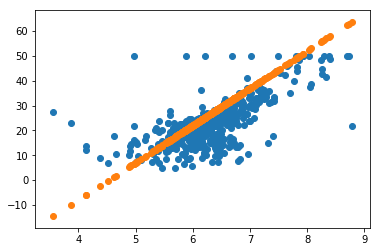

In [31]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 2nd-Method: Direction Adjusting

In [32]:
import random
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction) # 初始方向

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 50.88929001671627 best_b: -70.70921028996833, and the loss is: 52241.77570417271
When time is : 1, get best_k: 50.789290016716265 best_b: -70.60921028996833, and the loss is: 51998.46526029131
When time is : 2, get best_k: 50.689290016716264 best_b: -70.50921028996834, and the loss is: 51755.7232175264
When time is : 3, get best_k: 50.58929001671626 best_b: -70.40921028996834, and the loss is: 51513.549575877885
When time is : 4, get best_k: 50.48929001671626 best_b: -70.30921028996835, and the loss is: 51271.94433534594
When time is : 5, get best_k: 50.38929001671626 best_b: -70.20921028996835, and the loss is: 51030.90749593051
When time is : 6, get best_k: 50.28929001671626 best_b: -70.10921028996836, and the loss is: 50790.439057631454
When time is : 7, get best_k: 50.18929001671626 best_b: -70.00921028996837, and the loss is: 50550.539020448916
When time is : 8, get best_k: 50.089290016716255 best_b: -69.90921028996837, and the loss is: 50311.20738438

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

## 导数

In [357]:
loss([1, 1, 1], [2, 2, 3])

2.0

In [358]:
loss([1, 1, 1], [1, 1, 1])

0.0

In [289]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [284]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000